# Semana 3 - Dia 2: Random Forest 🌲🌲🌲
Exemplo prático de classificação e regressão usando Random Forest no scikit-learn.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.datasets import load_iris, load_diabetes
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

## 1) Classificação — Iris

In [4]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

Acurácia: 1.0

Relatório de Classificação:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Importância das features

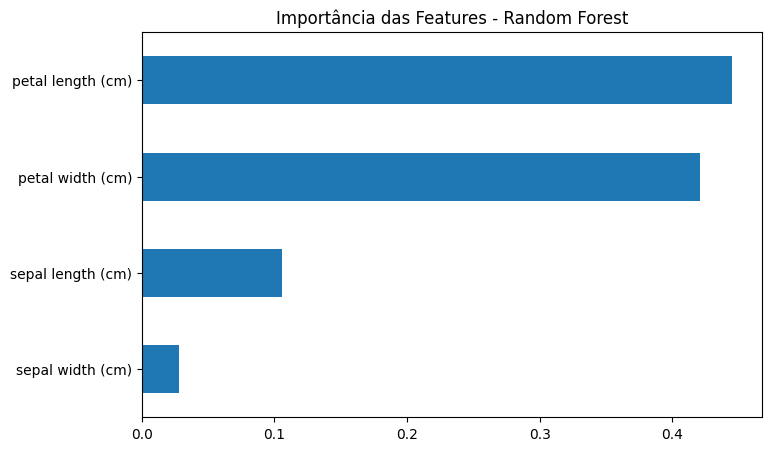

In [5]:
importances = rf_clf.feature_importances_
feat_importances = pd.Series(importances, index=iris.feature_names)
feat_importances.sort_values().plot(kind="barh", figsize=(8,5))
plt.title("Importância das Features - Random Forest")
plt.show()

## 2) Regressão — Diabetes

In [6]:
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_reg = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 2881.5791057118386
RMSE: 53.68034189265041


### Comparação real vs predito (regressão)

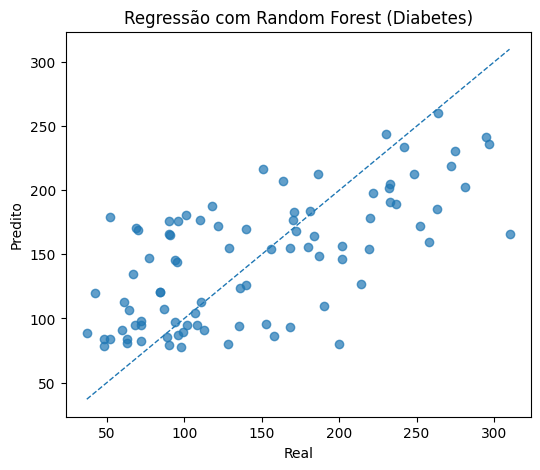

In [7]:
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Real")
plt.ylabel("Predito")
plt.title("Regressão com Random Forest (Diabetes)")
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, '--', linewidth=1)
plt.show()